In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

In [10]:

# Load the dataset
df = pd.read_excel("product_demand_forecasting.xlsx")


In [13]:

# Data Exploration

#2. Display the first 5 and last 5 rows of the dataset. 
print(df.head())
print(df.tail())


         Date  Product ID Product Name       Category  Sales Quantity  \
0  2022-01-01         101       Laptop    Electronics               9   
1  2022-01-01         102   Smartphone    Electronics              13   
2  2022-01-01         103   Headphones    Electronics              43   
3  2022-01-01         201      Shampoo  Personal Care              36   
4  2022-01-01         202         Soap  Personal Care              27   

   Unit Price  Revenue  Stock Level Seasonality Indicator  
0       82.94   746.45           23                Normal  
1       42.00   545.98          223                Normal  
2       37.83  1626.64           30                Normal  
3      118.55  4267.82          199                Normal  
4      120.72  3259.53          197                Normal  
            Date  Product ID Product Name       Category  Sales Quantity  \
5105  2023-12-31         103   Headphones    Electronics              25   
5106  2023-12-31         201      Shampoo  Person

In [11]:

#3. Check the shape of the dataset (rows and columns).
print("Shape of dataset:", df.shape)


Shape of dataset: (5110, 9)


In [13]:

#4. List the column names and data types of the dataset. 
print("Column Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Date                      object
Product ID                 int64
Product Name              object
Category                  object
Sales Quantity             int64
Unit Price               float64
Revenue                  float64
Stock Level                int64
Seasonality Indicator     object
dtype: object


In [15]:

#5. Check for missing values in the dataset and count them.
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Date                     0
Product ID               0
Product Name             0
Category                 0
Sales Quantity           0
Unit Price               0
Revenue                  0
Stock Level              0
Seasonality Indicator    0
dtype: int64


In [17]:

#6. Display summary statistics (mean, median, std, etc.) for the numerical columns.
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
        Product ID  Sales Quantity   Unit Price      Revenue  Stock Level
count  5110.000000     5110.000000  5110.000000  5110.000000  5110.000000
mean    187.428571       24.829354   104.746350  2610.965250   250.176125
std      83.089600       14.814553    54.292945  2221.458188   143.795760
min     101.000000        0.000000    10.010000     0.000000     0.000000
25%     102.000000       12.000000    58.585000   790.940000   126.000000
50%     201.000000       25.000000   102.920000  1997.045000   249.000000
75%     301.000000       38.000000   151.670000  3938.560000   375.000000
max     302.000000       50.000000   199.980000  9941.500000   500.000000


In [19]:

#7. Identify any duplicate rows in the dataset and remove them.
print("Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


In [21]:

#8. Get the number of unique values in each column.
print("Unique Values:")
print(df.nunique())


Unique Values:
Date                      730
Product ID                  7
Product Name                7
Category                    3
Sales Quantity             51
Unit Price               4505
Revenue                  4989
Stock Level               501
Seasonality Indicator       2
dtype: int64


In [45]:
# Data Cleaning

#1. Fill any missing values in numerical columns with the mean of the respective column.
print("Before Filling Missing Values:")
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill missing values in numerical columns with mean
print("After Filling Missing Values:")
print(df.isnull().sum())


Before Filling Missing Values:
Date                     0
Product ID               0
Product Name             0
Category                 0
Sales Quantity           0
Unit Price               0
Revenue                  0
Stock Level              0
Seasonality Indicator    0
dtype: int64
After Filling Missing Values:
Date                     0
Product ID               0
Product Name             0
Category                 0
Sales Quantity           0
Unit Price               0
Revenue                  0
Stock Level              0
Seasonality Indicator    0
dtype: int64


In [41]:

#2. Drop rows with any missing values. 
df.dropna(inplace=True)  # Drop rows with missing values
print("After Dropping Rows with Missing Values:")
print(df.shape)


After Dropping Rows with Missing Values:
(5110, 9)


In [47]:

#3. Replace all occurrences of a specific value in a column (e.g., replace 'NA' with NaN).
df.replace("NA", np.nan, inplace=True)  # Replace 'NA' with NaN
print("After Replacing 'NA' with NaN:")
print(df.isnull().sum())


After Replacing 'NA' with NaN:
Date                     0
Product ID               0
Product Name             0
Category                 0
Sales Quantity           0
Unit Price               0
Revenue                  0
Stock Level              0
Seasonality Indicator    0
dtype: int64


In [49]:

#4. Remove a specific column from the dataset. 
df.drop(columns=['Seasonality Indicator'], errors='ignore', inplace=True)  # Remove unwanted column
print("After Dropping Unwanted Column:")
print(df.columns)


After Dropping Unwanted Column:
Index(['Date', 'Product ID', 'Product Name', 'Category', 'Sales Quantity',
       'Unit Price', 'Revenue', 'Stock Level'],
      dtype='object')


In [53]:

#5. Rename a column from old_name to new_name. 
df.rename(columns={'Stock Level': 'Inventory Level'}, inplace=True)  # Rename column
print("After Renaming Column:")
print(df.columns)


After Renaming Column:
Index(['Date', 'Product ID', 'Product Name', 'Category', 'Sales Quantity',
       'Unit Price', 'Revenue', 'Inventory Level'],
      dtype='object')


In [55]:

#6. Convert a column from string format to date format. 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert string to date format
print("After Converting Date Column:")
print(df.dtypes)


After Converting Date Column:
Date               datetime64[ns]
Product ID                  int64
Product Name               object
Category                   object
Sales Quantity              int64
Unit Price                float64
Revenue                   float64
Inventory Level             int64
dtype: object


In [57]:

#7. Normalize a numerical column to scale the values between 0 and 1.
df['Normalized_Unit_Price'] = (df['Unit Price'] - df['Unit Price'].min()) / (df['Unit Price'].max() - df['Unit Price'].min()) 
print("After Normalizing Unit Price:")
print(df[['Unit Price', 'Normalized_Unit_Price']].head())


After Normalizing Unit Price:
   Unit Price  Normalized_Unit_Price
0       82.94               0.383903
1       42.00               0.168395
2       37.83               0.146444
3      118.55               0.571353
4      120.72               0.582776


In [61]:
# Data Selection and Filtering

#1. Select the Sales Quantity column from the DataFrame.
print(df['Sales Quantity'])


0        9
1       13
2       43
3       36
4       27
        ..
5105    25
5106    44
5107    37
5108    48
5109     1
Name: Sales Quantity, Length: 5110, dtype: int64


In [63]:

#2. Select the Product Name and Category columns from the DataFrame.
print(df[['Product Name', 'Category']])


     Product Name       Category
0          Laptop    Electronics
1      Smartphone    Electronics
2      Headphones    Electronics
3         Shampoo  Personal Care
4            Soap  Personal Care
...           ...            ...
5105   Headphones    Electronics
5106      Shampoo  Personal Care
5107         Soap  Personal Care
5108      T-shirt       Clothing
5109        Jeans       Clothing

[5110 rows x 2 columns]


In [65]:
#3. Filter the DataFrame to show rows where the Sales Quantity is greater than 30. 
print(df[df['Sales Quantity'] > 30])


           Date  Product ID Product Name       Category  Sales Quantity  \
2    2022-01-01         103   Headphones    Electronics              43   
3    2022-01-01         201      Shampoo  Personal Care              36   
9    2022-01-02         103   Headphones    Electronics              34   
10   2022-01-02         201      Shampoo  Personal Care              47   
12   2022-01-02         301      T-shirt       Clothing              33   
...         ...         ...          ...            ...             ...   
5096 2023-12-30         101       Laptop    Electronics              32   
5103 2023-12-31         101       Laptop    Electronics              45   
5106 2023-12-31         201      Shampoo  Personal Care              44   
5107 2023-12-31         202         Soap  Personal Care              37   
5108 2023-12-31         301      T-shirt       Clothing              48   

      Unit Price  Revenue  Inventory Level  Normalized_Unit_Price  
2          37.83  1626.64      

In [69]:

#4. Filter the dataset to display only rows where the Category is "Electronics".
print(df[df['Category'] == "Electronics"])


           Date  Product ID Product Name     Category  Sales Quantity  \
0    2022-01-01         101       Laptop  Electronics               9   
1    2022-01-01         102   Smartphone  Electronics              13   
2    2022-01-01         103   Headphones  Electronics              43   
7    2022-01-02         101       Laptop  Electronics              20   
8    2022-01-02         102   Smartphone  Electronics               7   
...         ...         ...          ...          ...             ...   
5097 2023-12-30         102   Smartphone  Electronics               3   
5098 2023-12-30         103   Headphones  Electronics              15   
5103 2023-12-31         101       Laptop  Electronics              45   
5104 2023-12-31         102   Smartphone  Electronics              13   
5105 2023-12-31         103   Headphones  Electronics              25   

      Unit Price  Revenue  Inventory Level  Normalized_Unit_Price  
0          82.94   746.45               23             

In [103]:

# Sorting
#1. Sort the DataFrame by Total_Sales in ascending order. 
print("Before Sorting:")
print(df.head())

df.sort_values(by='Total_Sales', ascending=True, inplace=True)
print("After Sorting by Total_Sales in Ascending Order:")
print(df.head())


Before Sorting:
           Date  Product ID     Item Product_Category  Total_Sales  \
5101 2023-12-30         301  T-shirt         Clothing            0   
3443 2023-05-07         302    Jeans         Clothing            0   
545  2022-03-19         302    Jeans         Clothing            0   
2554 2022-12-31         302    Jeans         Clothing            0   
3414 2023-05-03         301  T-shirt         Clothing            0   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  
5101           22.98            0.0               35               0.068274  
3443          142.42            0.0               18               0.697005  
545            30.25            0.0              193               0.106543  
2554           50.39            0.0              424               0.212560  
3414          192.18            0.0              377               0.958941  
After Sorting by Total_Sales in Ascending Order:
           Date  Product ID     Item Product_C

In [111]:

#2. Sort the column alphabetically (for example, Product_Category). 
df.sort_values(by='Product_Category', inplace=True)
print("After Sorting by Product_Category Alphabetically:")
print(df.head())


After Sorting by Product_Category Alphabetically:
           Date  Product ID     Item Product_Category  Total_Sales  \
4604 2023-10-20         301  T-shirt         Clothing           50   
4156 2023-08-17         301  T-shirt         Clothing           26   
4024 2023-07-29         302    Jeans         Clothing           49   
810  2022-04-26         301  T-shirt         Clothing           11   
537  2022-03-18         301  T-shirt         Clothing           18   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  
4604          198.83        9941.50              318               0.993946  
4156           76.57        1990.92              257               0.350371  
4024           40.67        1993.00               95               0.161394  
810           181.40        1995.37               44               0.902195  
537           110.94        1996.94              224               0.531294  


In [109]:

#3. Sort the column in descending order (for example, Total_Revenue).
df.sort_values(by='Total_Revenue', ascending=False, inplace=True)
print("After Sorting by Total_Revenue in Descending Order:")
print(df.head())


After Sorting by Total_Revenue in Descending Order:
           Date  Product ID        Item Product_Category  Total_Sales  \
4604 2023-10-20         301     T-shirt         Clothing           50   
4349 2023-09-14         103  Headphones      Electronics           50   
3191 2023-04-01         302       Jeans         Clothing           50   
3346 2023-04-24         101      Laptop      Electronics           50   
265  2022-02-07         302       Jeans         Clothing           50   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  
4604          198.83        9941.50              318               0.993946  
4349          198.31        9915.32              499               0.991209  
3191          197.39        9869.73              264               0.986366  
3346          196.02        9801.05              328               0.979155  
265           195.46        9773.13                7               0.976207  


In [107]:

#4. Sort the DataFrame by Category first and then by Sales . 
df.sort_values(by=['Product_Category', 'Total_Sales'], inplace=True)
print("After Sorting by Product_Category First, then by Total_Sales:")
print(df.head())


After Sorting by Product_Category First, then by Total_Sales:
           Date  Product ID     Item Product_Category  Total_Sales  \
5101 2023-12-30         301  T-shirt         Clothing            0   
3744 2023-06-19         302    Jeans         Clothing            0   
2169 2022-11-06         302    Jeans         Clothing            0   
2805 2023-02-05         301  T-shirt         Clothing            0   
4346 2023-09-13         302    Jeans         Clothing            0   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  
5101           22.98            0.0               35               0.068274  
3744          168.78            0.0              417               0.835764  
2169          185.08            0.0              219               0.921567  
2805           89.01            0.0              118               0.415855  
4346          125.15            0.0                3               0.606096  


In [105]:

#5. Sort the DataFrame by Total_Sales and keep only the first 3 rows. 
print("After Sorting by Total_Sales and Keeping Only First 3 Rows:")
print(df.sort_values(by='Total_Sales').head(3))

After Sorting by Total_Sales and Keeping Only First 3 Rows:
           Date  Product ID        Item Product_Category  Total_Sales  \
5101 2023-12-30         301     T-shirt         Clothing            0   
625  2022-03-31         103  Headphones      Electronics            0   
554  2022-03-21         102  Smartphone      Electronics            0   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  
5101           22.98            0.0               35               0.068274  
625           153.30            0.0              295               0.754277  
554            98.21            0.0              364               0.464284  


In [15]:
# Renaming Columns

#1. Rename the Product Name column to Item. 
print("Before Renaming Columns:")
print(df.columns)
df.rename(columns={'Product Name': 'Item'}, inplace=True)
print("After Renaming 'Product Name' to 'Item':")
print(df.columns)


Before Renaming Columns:
Index(['Date', 'Product ID', 'Product Name', 'Category', 'Sales Quantity',
       'Unit Price', 'Revenue', 'Stock Level', 'Seasonality Indicator'],
      dtype='object')
After Renaming 'Product Name' to 'Item':
Index(['Date', 'Product ID', 'Item', 'Category', 'Sales Quantity',
       'Unit Price', 'Revenue', 'Stock Level', 'Seasonality Indicator'],
      dtype='object')


In [17]:

#2. Rename the Sales Quantity column to Total_Sales.
df.rename(columns={'Sales Quantity': 'Total_Sales'}, inplace=True)
print("After Renaming 'Sales Quantity' to 'Total_Sales':")
print(df.columns)


After Renaming 'Sales Quantity' to 'Total_Sales':
Index(['Date', 'Product ID', 'Item', 'Category', 'Total_Sales', 'Unit Price',
       'Revenue', 'Stock Level', 'Seasonality Indicator'],
      dtype='object')


In [19]:

#3. Rename multiple columns at once (e.g., Unit Price to Price_Per_Unit and Category to Product_Category). 
df.rename(columns={'Unit Price': 'Price_Per_Unit', 'Category': 'Product_Category'}, inplace=True)
print("After Renaming Multiple Columns (Unit Price to Price_Per_Unit, Category to Product_Category):")
print(df.columns)


After Renaming Multiple Columns (Unit Price to Price_Per_Unit, Category to Product_Category):
Index(['Date', 'Product ID', 'Item', 'Product_Category', 'Total_Sales',
       'Price_Per_Unit', 'Revenue', 'Stock Level', 'Seasonality Indicator'],
      dtype='object')


In [21]:

#4. Change the column name to a simpler one (e.g., Revenue to Total_Revenue).
df.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)
print("After Renaming 'Revenue' to 'Total_Revenue':")
print(df.columns)


After Renaming 'Revenue' to 'Total_Revenue':
Index(['Date', 'Product ID', 'Item', 'Product_Category', 'Total_Sales',
       'Price_Per_Unit', 'Total_Revenue', 'Stock Level',
       'Seasonality Indicator'],
      dtype='object')


In [23]:

# Data Aggregation

#1. Find the average of the Total_Sales column. 
print("Mean of Total_Sales:", df['Total_Sales'].mean())


Mean of Total_Sales: 24.8293542074364


In [25]:

#2. Find the total sum of the Total_Revenue column. 
print("Total Revenue Sum:", df['Total_Revenue'].sum())


Total Revenue Sum: 13342032.43


In [27]:

#3. Count how many times each value appears in the Product_Category column. 
print("Count of Each Product_Category:")
print(df['Product_Category'].value_counts())


Count of Each Product_Category:
Product_Category
Electronics      2190
Personal Care    1460
Clothing         1460
Name: count, dtype: int64


In [29]:

#4. Calculate the total sum of Total_Sales for each unique value in the Product_Category column. 
print("Sum of Total_Sales Grouped by Product_Category:")
print(df.groupby('Product_Category')['Total_Sales'].sum())


Sum of Total_Sales Grouped by Product_Category:
Product_Category
Clothing         36326
Electronics      53367
Personal Care    37185
Name: Total_Sales, dtype: int64


In [31]:

#5. Find the highest Total_Sales in the dataset. 
print("Maximum Total_Sales Value:", df['Total_Sales'].max())


Maximum Total_Sales Value: 50


In [33]:

#6. Calculate the minimum Price_Per_Unit in the dataset.
print("Minimum Price_Per_Unit:", df['Price_Per_Unit'].min())


Minimum Price_Per_Unit: 10.01


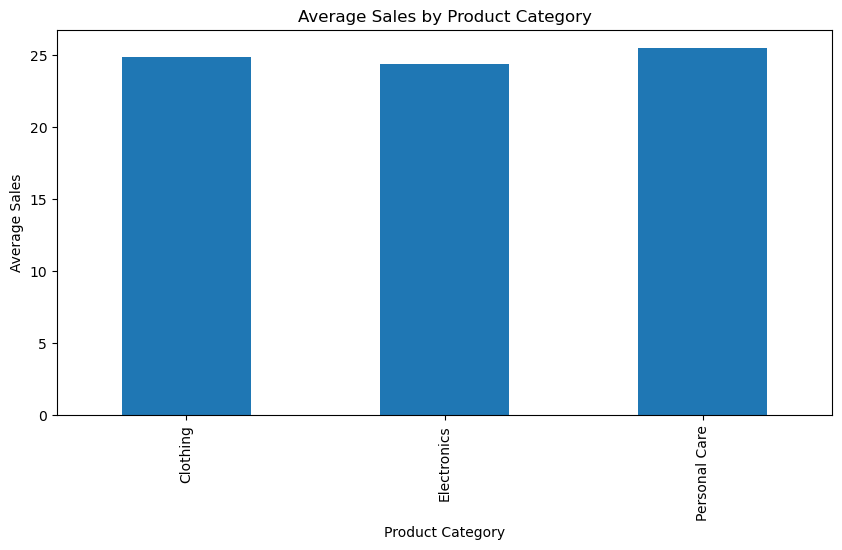

In [125]:
# Data Visualization

#1. Create a simple bar plot of Product_Category vs. Total_Sales. 
plt.figure(figsize=(10, 5))
df.groupby('Product_Category')['Total_Sales'].mean().plot(kind='bar')
plt.title("Average Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Sales")
plt.show()


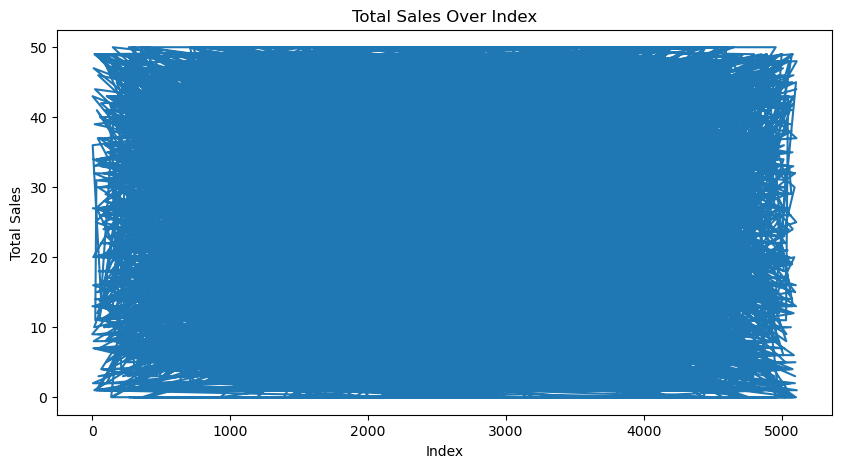

In [127]:

#2. Create a line plot for Total_Sales over an index. 
plt.figure(figsize=(10, 5))
df['Total_Sales'].plot(kind='line')
plt.title("Total Sales Over Index")
plt.xlabel("Index")
plt.ylabel("Total Sales")
plt.show()


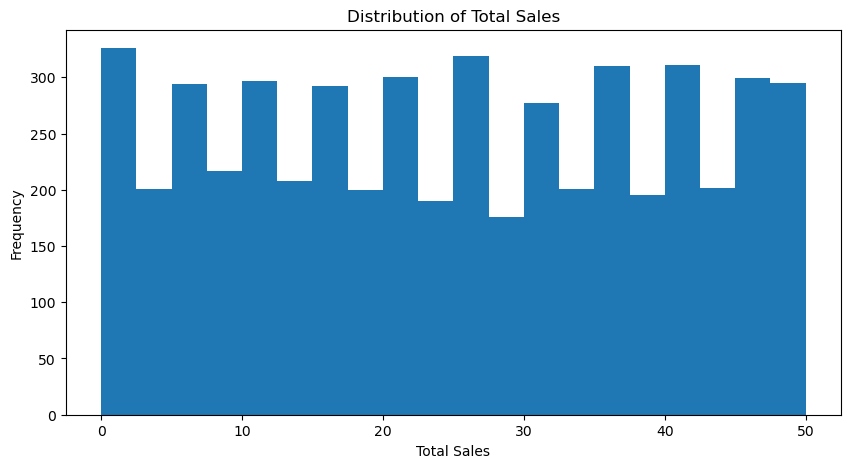

In [129]:
#3. Create a histogram for the Total_Sales column. 
plt.figure(figsize=(10, 5))
df['Total_Sales'].plot(kind='hist', bins=20)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


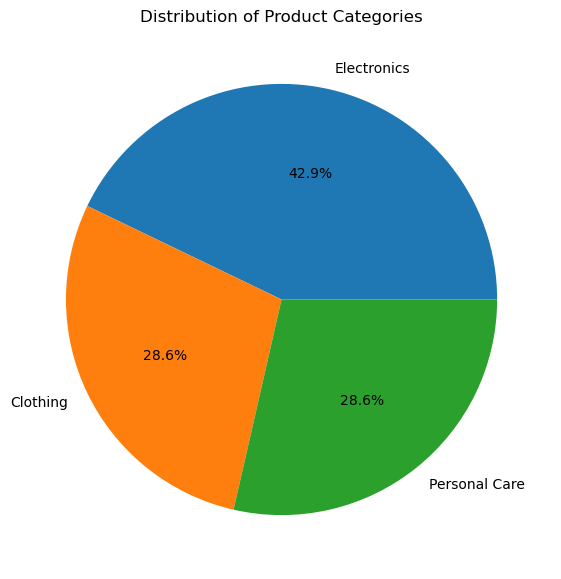

In [131]:

#4. Create a pie chart to show the distribution of values in the Product_Category column. 
plt.figure(figsize=(7, 7))
df['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Product Categories")
plt.ylabel("")
plt.show()


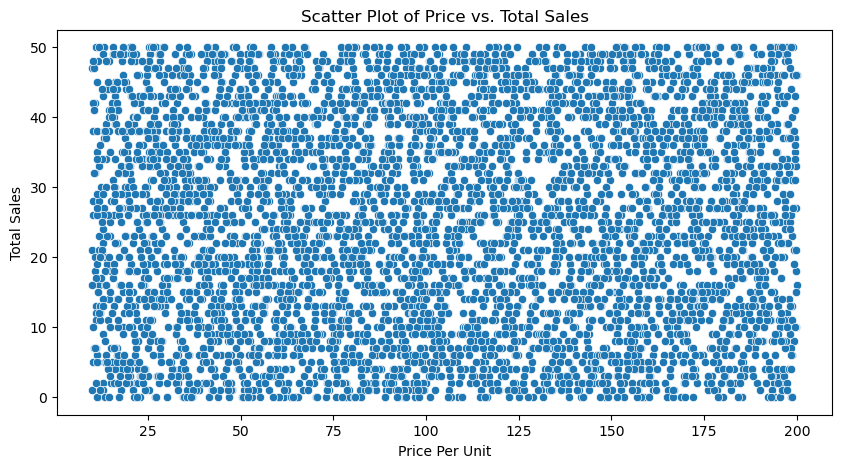

In [147]:

#5. Create a scatter plot between Total_Sales and Price_Per_Unit. 
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Price_Per_Unit'], y=df['Total_Sales'])
plt.title("Scatter Plot of Price vs. Total Sales")
plt.xlabel("Price Per Unit")
plt.ylabel("Total Sales")
plt.show()


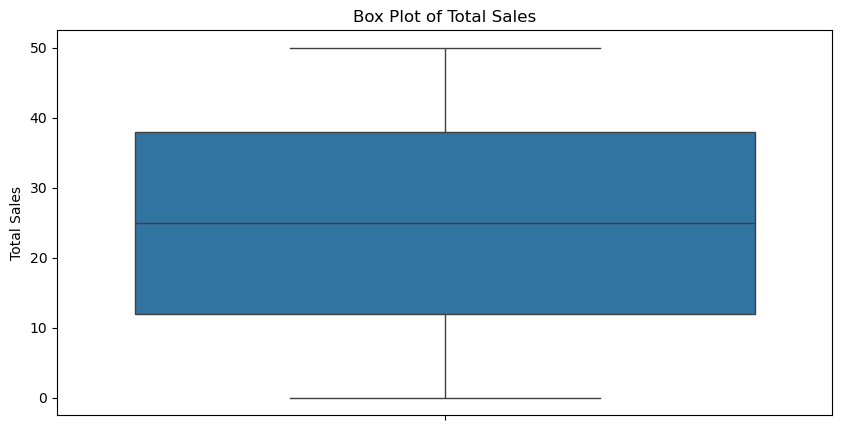

In [135]:

#6. Display a box plot for the Total_Sales column. 
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['Total_Sales'])
plt.title("Box Plot of Total Sales")
plt.ylabel("Total Sales")
plt.show()


In [149]:

# String Manipulation

#1. Convert the Product_Category column values to lowercase. 
print("Before String Manipulation:")
print(df[['Product_Category', 'Item']].head())


Before String Manipulation:
     Product_Category     Item
4604         Clothing  T-shirt
4156         Clothing  T-shirt
4024         Clothing    Jeans
810          Clothing  T-shirt
537          Clothing  T-shirt


In [151]:

#2. Extract the first 3 characters of the Product_Category column. 
df['Product_Category'] = df['Product_Category'].str.lower()
print("After Converting Product_Category to Lowercase:")
print(df[['Product_Category']].head())


After Converting Product_Category to Lowercase:
     Product_Category
4604         clothing
4156         clothing
4024         clothing
810          clothing
537          clothing


In [153]:
#3. Split the Name column into two columns: Product_Category and Category_Short. 
df['Category_Short'] = df['Product_Category'].str[:3]
print("After Extracting First 3 Characters of Product_Category:")
print(df[['Product_Category', 'Category_Short']].head())


After Extracting First 3 Characters of Product_Category:
     Product_Category Category_Short
4604         clothing            clo
4156         clothing            clo
4024         clothing            clo
810          clothing            clo
537          clothing            clo


In [171]:

#4. Concatenate the Item_First_Part and Item_Second_Part columns into a new column Item_Full. 
split_names = df['Item'].str.split(n=1, expand=True)
df['Item_First_Part'] = split_names[0]
df['Item_Second_Part'] = split_names.get(1, '')  # Safe extraction of the second part
print("After Splitting Item into Item_First_Part and Item_Second_Part:")
print(df[['Item', 'Item_First_Part', 'Item_Second_Part']].head())

df['Item_Full'] = (df['Item_First_Part'] + ' ' + df['Item_Second_Part']).str.strip()
print("After Concatenating Item_First_Part and Item_Second_Part into Item_Full:")
print(df[['Item_First_Part', 'Item_Second_Part', 'Item_Full']].head())



After Splitting Item into Item_First_Part and Item_Second_Part:
         Item Item_First_Part Item_Second_Part
4604  T-shirt         T-shirt                 
4156  T-shirt         T-shirt                 
4024    Jeans           Jeans                 
810   T-shirt         T-shirt                 
537   T-shirt         T-shirt                 
After Concatenating Item_First_Part and Item_Second_Part into Item_Full:
     Item_First_Part Item_Second_Part Item_Full
4604         T-shirt                    T-shirt
4156         T-shirt                    T-shirt
4024           Jeans                      Jeans
810          T-shirt                    T-shirt
537          T-shirt                    T-shirt


In [173]:

#5. Replace all spaces in the Product_Category column with underscores. 
df['Product_Category'] = df['Product_Category'].str.replace(" ", "_")
print("After Replacing Spaces in Product_Category with Underscores:")
print(df[['Product_Category']].head())


After Replacing Spaces in Product_Category with Underscores:
     Product_Category
4604         clothing
4156         clothing
4024         clothing
810          clothing
537          clothing


In [175]:
# iloc Indexing
#1. Select the first row of the dataset using iloc.
print("First row of the dataset:")
print(df.iloc[0])


First row of the dataset:
Date                     2023-10-20 00:00:00
Product ID                               301
Item                                 T-shirt
Product_Category                    clothing
Total_Sales                               50
Price_Per_Unit                        198.83
Total_Revenue                         9941.5
Inventory Level                          318
Normalized_Unit_Price               0.993946
Category_Short                           clo
Item_First_Part                      T-shirt
Item_Second_Part                            
Item_Full                            T-shirt
Name: 4604, dtype: object


In [177]:

#2. Select the last 3 rows of the dataset using iloc. 
print("Last 3 rows of the dataset:")
print(df.iloc[-3:])


Last 3 rows of the dataset:
           Date  Product ID     Item Product_Category  Total_Sales  \
3734 2023-06-18         201  Shampoo    personal_care           36   
3868 2023-07-07         202     Soap    personal_care           15   
1712 2022-09-02         202     Soap    personal_care           43   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  \
3734           68.56        2468.21               31               0.308207   
3868          171.89        2578.37              335               0.852135   
1712          100.09        4303.72              130               0.474180   

     Category_Short Item_First_Part Item_Second_Part Item_Full  
3734            per         Shampoo                    Shampoo  
3868            per            Soap                       Soap  
1712            per            Soap                       Soap  


In [179]:

#3. Select the first 5 rows and the first 3 columns using iloc. 
print("First 5 rows and first 3 columns:")
print(df.iloc[:5, :3])


First 5 rows and first 3 columns:
           Date  Product ID     Item
4604 2023-10-20         301  T-shirt
4156 2023-08-17         301  T-shirt
4024 2023-07-29         302    Jeans
810  2022-04-26         301  T-shirt
537  2022-03-18         301  T-shirt


In [181]:

#4. Select all rows of the dataset but only the 2nd and 3rd columns using iloc. 
print("All rows but only the 2nd and 3rd columns:")
print(df.iloc[:, 1:3])


All rows but only the 2nd and 3rd columns:
      Product ID     Item
4604         301  T-shirt
4156         301  T-shirt
4024         302    Jeans
810          301  T-shirt
537          301  T-shirt
...          ...      ...
4904         202     Soap
647          201  Shampoo
3734         201  Shampoo
3868         202     Soap
1712         202     Soap

[5110 rows x 2 columns]


In [183]:

#5. Select the value at the 4th row and 2nd column using iloc. 
print("Value at the 4th row and 2nd column:")
print(df.iloc[3, 1])


Value at the 4th row and 2nd column:
301


In [185]:

#6. Use iloc to select rows 2 to 5 and columns 1 to 4.
print("Rows 2 to 5 and columns 1 to 4:")
print(df.iloc[2:6, 0:4])


Rows 2 to 5 and columns 1 to 4:
           Date  Product ID     Item Product_Category
4024 2023-07-29         302    Jeans         clothing
810  2022-04-26         301  T-shirt         clothing
537  2022-03-18         301  T-shirt         clothing
565  2022-03-22         301  T-shirt         clothing


In [187]:

# loc - Label-based indexing
#1. Select the row where the Name is "Laptop" using loc. 
print("Rows where Item is 'Laptop':")
print(df.loc[df['Item'] == 'Laptop'])


Rows where Item is 'Laptop':
           Date  Product ID    Item Product_Category  Total_Sales  \
3430 2023-05-06         101  Laptop      electronics           39   
1134 2022-06-12         101  Laptop      electronics           19   
2569 2023-01-03         101  Laptop      electronics           28   
3682 2023-06-11         101  Laptop      electronics           12   
4585 2023-10-18         101  Laptop      electronics            5   
...         ...         ...     ...              ...          ...   
882  2022-05-07         101  Laptop      electronics           12   
4249 2023-08-31         101  Laptop      electronics           39   
1330 2022-07-10         101  Laptop      electronics           27   
2429 2022-12-14         101  Laptop      electronics           22   
5054 2023-12-24         101  Laptop      electronics           33   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  \
3430          157.42        6139.23              314           

In [189]:

#2. Select rows where the Total_Sales is greater than 30 using loc. 
print("Rows where Total_Sales is greater than 30:")
print(df.loc[df['Total_Sales'] > 30])


Rows where Total_Sales is greater than 30:
           Date  Product ID     Item Product_Category  Total_Sales  \
4604 2023-10-20         301  T-shirt         clothing           50   
4024 2023-07-29         302    Jeans         clothing           49   
565  2022-03-22         301  T-shirt         clothing           38   
1343 2022-07-11         302    Jeans         clothing           42   
4381 2023-09-18         302    Jeans         clothing           45   
...         ...         ...      ...              ...          ...   
2180 2022-11-08         201  Shampoo    personal_care           43   
2292 2022-11-24         201  Shampoo    personal_care           48   
4904 2023-12-02         202     Soap    personal_care           40   
3734 2023-06-18         201  Shampoo    personal_care           36   
1712 2022-09-02         202     Soap    personal_care           43   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Price  \
4604          198.83        9941.50  

In [191]:

#3. Select the City column for rows where Total_Sales is between 20 and 40 using loc. 
print("Product_Category where Total_Sales is between 20 and 40:")
print(df.loc[(df['Total_Sales'] > 20) & (df['Total_Sales'] < 40), 'Product_Category'])


Product_Category where Total_Sales is between 20 and 40:
4156         clothing
565          clothing
817          clothing
1287         clothing
2595         clothing
            ...      
2978    personal_care
606     personal_care
4784    personal_care
3378    personal_care
3734    personal_care
Name: Product_Category, Length: 1853, dtype: object


In [193]:

#4. Select all rows and columns where City is "electronics" using loc. 
print("All rows where Product_Category is 'electronics':")
print(df.loc[df['Product_Category'] == 'electronics'])


All rows where Product_Category is 'electronics':
           Date  Product ID        Item Product_Category  Total_Sales  \
3684 2023-06-11         103  Headphones      electronics           49   
506  2022-03-14         103  Headphones      electronics           15   
3074 2023-03-16         102  Smartphone      electronics           18   
3430 2023-05-06         101      Laptop      electronics           39   
3886 2023-07-10         102  Smartphone      electronics           22   
...         ...         ...         ...              ...          ...   
2429 2022-12-14         101      Laptop      electronics           22   
1591 2022-08-16         103  Headphones      electronics           46   
5054 2023-12-24         101      Laptop      electronics           33   
5069 2023-12-26         102  Smartphone      electronics           29   
3943 2023-07-18         103  Headphones      electronics           38   

      Price_Per_Unit  Total_Revenue  Inventory Level  Normalized_Unit_Pri

In [195]:

#5. Select multiple columns (Item, Product_Category) for a specific row with loc. 
print("Selecting multiple columns (Item, Product_Category) for a specific row (index 5):")
print(df.loc[5, ['Item', 'Product_Category']])


Selecting multiple columns (Item, Product_Category) for a specific row (index 5):
Item                 T-shirt
Product_Category    clothing
Name: 5, dtype: object


In [197]:

#6. Use loc to select the row where Total_Sales is greater than 25 and the Product_Category is "furniture".
print("Rows where Total_Sales > 25 and Product_Category is 'furniture':")
print(df.loc[(df['Total_Sales'] > 25) & (df['Product_Category'] == 'furniture')])


Rows where Total_Sales > 25 and Product_Category is 'furniture':
Empty DataFrame
Columns: [Date, Product ID, Item, Product_Category, Total_Sales, Price_Per_Unit, Total_Revenue, Inventory Level, Normalized_Unit_Price, Category_Short, Item_First_Part, Item_Second_Part, Item_Full]
Index: []


In [37]:

# replace - Replacing values in a DataFrame: (Any 5) 
# 1. Replace 'Electronics' with 'Tech Gadgets' in 'Product_Category'
df['Product_Category'].replace("Electronics", "Tech Gadgets", inplace=True)
print("After Replacing 'Electronics' with 'Tech Gadgets' in Product_Category:")
print(df[['Product_Category']].head())


After Replacing 'Electronics' with 'Tech Gadgets' in Product_Category:
  Product_Category
0     Tech Gadgets
1     Tech Gadgets
2     Tech Gadgets
3    Personal Care
4    Personal Care


C:\Users\chava\AppData\Local\Temp\ipykernel_23732\3491717822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category'].replace("Electronics", "Tech Gadgets", inplace=True)


In [39]:

# 2. Replace 0 with NaN in 'Total_Sales'
df['Total_Sales'].replace(0, np.nan, inplace=True)
print("After Replacing 0 with NaN in Total_Sales:")
print(df[['Total_Sales']].head())


After Replacing 0 with NaN in Total_Sales:
   Total_Sales
0          9.0
1         13.0
2         43.0
3         36.0
4         27.0


C:\Users\chava\AppData\Local\Temp\ipykernel_23732\93027187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Sales'].replace(0, np.nan, inplace=True)


In [41]:

# 3. Replace all occurrences of 100 with 50 in the entire DataFrame
df.replace(100, 50, inplace=True)
print("After Replacing all occurrences of 100 with 50:")
print(df.head())


After Replacing all occurrences of 100 with 50:
         Date  Product ID        Item Product_Category  Total_Sales  \
0  2022-01-01         101      Laptop     Tech Gadgets          9.0   
1  2022-01-01         102  Smartphone     Tech Gadgets         13.0   
2  2022-01-01         103  Headphones     Tech Gadgets         43.0   
3  2022-01-01         201     Shampoo    Personal Care         36.0   
4  2022-01-01         202        Soap    Personal Care         27.0   

   Price_Per_Unit  Total_Revenue  Stock Level Seasonality Indicator  
0           82.94         746.45           23                Normal  
1           42.00         545.98          223                Normal  
2           37.83        1626.64           30                Normal  
3          118.55        4267.82          199                Normal  
4          120.72        3259.53          197                Normal  


In [61]:

# 4. Identify a categorical column with two unique values and print before replacing
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2:
        print(f"Before Replacing in {col}:")
        print(df[[col]].head())
        df[col].replace({unique_values[0]: 1, unique_values[1]: 0}, inplace=True)
        print(f"After Replacing '{unique_values[0]}' with 1 and '{unique_values[1]}' with 0 in {col}:")
        print(df[[col]].head())
        break

In [67]:
# Replacing 'High' and 'Low' in relevant column
if 'Stock_Status' in df.columns:
    df['Stock_Status'].replace({'High': 'Medium', 'Low': 'Small'}, inplace=True)
    print("After Replacing 'High' with 'Medium' and 'Low' with 'Small' in Stock_Status:")
    print(df[['Stock_Status']].head())
elif 'Product_Demand' in df.columns:
    df['Product_Demand'].replace({'High': 'Medium', 'Low': 'Small'}, inplace=True)
    print("After Replacing 'High' with 'Medium' and 'Low' with 'Small' in Product_Demand:")
    print(df[['Product_Demand']].head())
print(df.head(5))


         Date  Product ID        Item Product_Category  Total_Sales  \
0  2022-01-01         101      Laptop     Tech Gadgets          9.0   
1  2022-01-01         102  Smartphone     Tech Gadgets         13.0   
2  2022-01-01         103  Headphones     Tech Gadgets         43.0   
3  2022-01-01         201     Shampoo    Personal Care         36.0   
4  2022-01-01         202        Soap    Personal Care         27.0   

   Price_Per_Unit  Total_Revenue  Stock Level  Seasonality Indicator  
0           82.94         746.45           23                      1  
1           42.00         545.98          223                      1  
2           37.83        1626.64           30                      1  
3          118.55        4267.82          199                      1  
4          120.72        3259.53          197                      1  


In [69]:
# 6. Replace 'NA' in 'Total_Sales' with the mean of the column
if 'Total_Sales' in df.columns:
    df['Price_Per_Unit'].fillna(df['Price_Per_Unit'].mean(), inplace=True)
    print("After Replacing 'NA' in Price_Per_Unit with the mean of the column:")
    print(df[['Total_Sales']].head())


After Replacing 'NA' in Price_Per_Unit with the mean of the column:
   Total_Sales
0          9.0
1         13.0
2         43.0
3         36.0
4         27.0


C:\Users\chava\AppData\Local\Temp\ipykernel_23732\3938528698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_Per_Unit'].fillna(df['Price_Per_Unit'].mean(), inplace=True)


In [73]:
# Indexing and Resetting Index
print("Before setting index:")
print(df.head())

# 1. Set 'Product_Category' as index
df.set_index('Product_Category', inplace=True)
print("After setting 'Product_Category' as index:")
print(df.head())


Before setting index:
         Date  Product ID        Item Product_Category  Total_Sales  \
0  2022-01-01         101      Laptop     Tech Gadgets          9.0   
1  2022-01-01         102  Smartphone     Tech Gadgets         13.0   
2  2022-01-01         103  Headphones     Tech Gadgets         43.0   
3  2022-01-01         201     Shampoo    Personal Care         36.0   
4  2022-01-01         202        Soap    Personal Care         27.0   

   Price_Per_Unit  Total_Revenue  Stock Level  Seasonality Indicator  
0           82.94         746.45           23                      1  
1           42.00         545.98          223                      1  
2           37.83        1626.64           30                      1  
3          118.55        4267.82          199                      1  
4          120.72        3259.53          197                      1  
After setting 'Product_Category' as index:
                        Date  Product ID        Item  Total_Sales  \
Product_Categ

In [75]:

# 2. Reset index back to default
df.reset_index(inplace=True)
print("After resetting index:")
print(df.head())


After resetting index:
  Product_Category        Date  Product ID        Item  Total_Sales  \
0     Tech Gadgets  2022-01-01         101      Laptop          9.0   
1     Tech Gadgets  2022-01-01         102  Smartphone         13.0   
2     Tech Gadgets  2022-01-01         103  Headphones         43.0   
3    Personal Care  2022-01-01         201     Shampoo         36.0   
4    Personal Care  2022-01-01         202        Soap         27.0   

   Price_Per_Unit  Total_Revenue  Stock Level  Seasonality Indicator  
0           82.94         746.45           23                      1  
1           42.00         545.98          223                      1  
2           37.83        1626.64           30                      1  
3          118.55        4267.82          199                      1  
4          120.72        3259.53          197                      1  


In [77]:

# 3. Set multi-level index with 'Product_Category' and 'Date'
df.set_index(['Product_Category', 'Date'], inplace=True)
print("After setting multi-level index with 'Product_Category' and 'Date':")
print(df.head())


After setting multi-level index with 'Product_Category' and 'Date':
                             Product ID        Item  Total_Sales  \
Product_Category Date                                              
Tech Gadgets     2022-01-01         101      Laptop          9.0   
                 2022-01-01         102  Smartphone         13.0   
                 2022-01-01         103  Headphones         43.0   
Personal Care    2022-01-01         201     Shampoo         36.0   
                 2022-01-01         202        Soap         27.0   

                             Price_Per_Unit  Total_Revenue  Stock Level  \
Product_Category Date                                                     
Tech Gadgets     2022-01-01           82.94         746.45           23   
                 2022-01-01           42.00         545.98          223   
                 2022-01-01           37.83        1626.64           30   
Personal Care    2022-01-01          118.55        4267.82          199   
     

In [79]:

# 4. Access a specific row using index
df.reset_index(inplace=True)  # Reset index to avoid multi-level conflicts
print("Accessing a specific row with index value 'Home Gadgets':")
print(df[df['Product_Category'] == 'Home Gadgets'])


Accessing a specific row with index value 'Home Gadgets':
Empty DataFrame
Columns: [Product_Category, Date, Product ID, Item, Total_Sales, Price_Per_Unit, Total_Revenue, Stock Level, Seasonality Indicator]
Index: []


In [81]:

# 5. Check index type and uniqueness
print("Index type:", df.index.dtype)
print("Is index unique?", df.index.is_unique)


Index type: int64
Is index unique? True


In [83]:

# 6. Rename index labels
df.index = [f"Row_{i+1}" for i in range(len(df))]
print("After renaming index labels:")
print(df.head())
df.set_index('Product_Category', inplace=True)
df.reset_index(inplace=True)
print("After Resetting Index:")
print(df.head())

After renaming index labels:
      Product_Category        Date  Product ID        Item  Total_Sales  \
Row_1     Tech Gadgets  2022-01-01         101      Laptop          9.0   
Row_2     Tech Gadgets  2022-01-01         102  Smartphone         13.0   
Row_3     Tech Gadgets  2022-01-01         103  Headphones         43.0   
Row_4    Personal Care  2022-01-01         201     Shampoo         36.0   
Row_5    Personal Care  2022-01-01         202        Soap         27.0   

       Price_Per_Unit  Total_Revenue  Stock Level  Seasonality Indicator  
Row_1           82.94         746.45           23                      1  
Row_2           42.00         545.98          223                      1  
Row_3           37.83        1626.64           30                      1  
Row_4          118.55        4267.82          199                      1  
Row_5          120.72        3259.53          197                      1  
After Resetting Index:
  Product_Category        Date  Product ID     

In [87]:
# Grouping and Aggregation

# 1. Group the dataset by Product_Category and find the average Price_Per_Unit for each category
print("Grouping by Product_Category and finding average Price:")
print(df.groupby('Product_Category')['Price_Per_Unit'].mean())


Grouping by Product_Category and finding average Price:
Product_Category
Clothing         104.590356
Personal Care    104.809856
Tech Gadgets     104.762347
Name: Price_Per_Unit, dtype: float64


In [89]:

# 2. Group by Price_Per_Unit and get the count of each group in the Product_Category column
print("Grouping by Price and counting occurrences in Product_Category:")
print(df.groupby('Price_Per_Unit')['Product_Category'].count())


Grouping by Price and counting occurrences in Product_Category:
Price_Per_Unit
10.01     1
10.03     2
10.07     1
10.10     2
10.12     1
         ..
199.83    1
199.84    1
199.86    1
199.92    1
199.98    1
Name: Product_Category, Length: 4505, dtype: int64


In [91]:

# 3. Group the data by Product and calculate the total Sales for each product category
print("Grouping by Product_Category and calculating total sales:")
print(df.groupby('Product_Category')['Total_Sales'].sum())


Grouping by Product_Category and calculating total sales:
Product_Category
Clothing         36985.238209
Personal Care    38097.791367
Tech Gadgets     54482.633893
Name: Total_Sales, dtype: float64


In [93]:

# 4. Group by Price_Per_Unit and display the sum of Total_Sales for each Price group
print("Grouping by Price and summing Total_Sales:")
print(df.groupby('Price_Per_Unit')['Total_Sales'].sum())


Grouping by Price and summing Total_Sales:
Price_Per_Unit
10.01     21.0
10.03     63.0
10.07      1.0
10.10     52.0
10.12     26.0
          ... 
199.83    46.0
199.84    21.0
199.86    27.0
199.92    16.0
199.98    46.0
Name: Total_Sales, Length: 4505, dtype: float64


In [99]:
# 5. Group by Product_Category and find the number of unique entries in the Item column
print("Grouping by Product_Category and counting unique Product_IDs:")
print(df.groupby('Product_Category')['Item'].nunique())

Grouping by Product_Category and counting unique Product_IDs:
Product_Category
Clothing         2
Personal Care    2
Tech Gadgets     3
Name: Item, dtype: int64


In [97]:

# 6. Group the dataset by Product_Category and find the maximum value of Total_Sales for each group
print("Grouping by Product_Category and finding max Total_Sales:")
print(df.groupby('Product_Category')['Total_Sales'].max())
print("Grouping by Product_Category and calculating Total Sales:")
print(df.groupby('Product_Category')['Total_Sales'].sum())


Grouping by Product_Category and finding max Total_Sales:
Product_Category
Clothing         50.0
Personal Care    50.0
Tech Gadgets     50.0
Name: Total_Sales, dtype: float64
Grouping by Product_Category and calculating Total Sales:
Product_Category
Clothing         36985.238209
Personal Care    38097.791367
Tech Gadgets     54482.633893
Name: Total_Sales, dtype: float64


In [101]:
# Aggregation - Performing multiple aggregations

# 1. Group by Product_Category and calculate both the mean and median of Price_Per_Unit
print("Grouping by Product_Category and calculating mean & median Price_Per_Unit:")
print(df.groupby('Product_Category')['Price_Per_Unit'].agg(['mean', 'median']))


Grouping by Product_Category and calculating mean & median Price_Per_Unit:
                        mean   median
Product_Category                     
Clothing          104.590356  105.700
Personal Care     104.809856  101.380
Tech Gadgets      104.762347  102.275


In [103]:

# 2. Perform multiple aggregations: find the sum, mean, and count of Total_Sales grouped by Product_Category
print("Grouping by Product_Category and performing sum, mean, count on Total_Sales:")
print(df.groupby('Product_Category')['Total_Sales'].agg(['sum', 'mean', 'count']))


Grouping by Product_Category and performing sum, mean, count on Total_Sales:
                           sum       mean  count
Product_Category                                
Clothing          36985.238209  25.332355   1460
Personal Care     38097.791367  26.094378   1460
Tech Gadgets      54482.633893  24.877915   2190


In [105]:

# 3. Group by Item and apply min() and max() functions to the Price_Per_Unit column
print("Grouping by Item and finding min and max of Price_Per_Unit:")
print(df.groupby('Item')['Price_Per_Unit'].agg(['min', 'max']))


Grouping by Item and finding min and max of Price_Per_Unit:
              min     max
Item                     
Headphones  11.01  199.73
Jeans       10.07  199.92
Laptop      10.03  199.74
Shampoo     10.54  199.46
Smartphone  10.15  199.86
Soap        10.12  199.98
T-shirt     10.01  199.76


In [107]:

# 4. Group by Product_Category and apply a custom aggregation function (e.g., find the range of Total_Sales within each category)
def sales_range(series):
    return series.max() - series.min()
print("Grouping by Product_Category and calculating range of Total_Sales:")
print(df.groupby('Product_Category')['Total_Sales'].agg(sales_range))


Grouping by Product_Category and calculating range of Total_Sales:
Product_Category
Clothing         49.0
Personal Care    49.0
Tech Gadgets     49.0
Name: Total_Sales, dtype: float64


In [123]:
# 5. Group by Product_Category and calculate the average Total_Sales along with the total Total_Revenue for each group
print("Grouping by Product_Category and calculating average Total_Sales and total Inventory Level:")
print(df.groupby('Product_Category').agg({'Total_Sales': 'mean', 'Total_Revenue': 'sum'}))


Grouping by Product_Category and calculating average Total_Sales and total Inventory Level:
                  Total_Sales  Total_Revenue
Product_Category                            
Clothing            25.332355     3807908.07
Personal Care       26.094378     3891317.62
Tech Gadgets        24.877915     5642806.74


In [111]:

# 6. Group the data by Product_Category and find both the standard deviation and the variance of Total_Revenue
print("Grouping by Product_Category and calculating standard deviation and variance of Total_Revenue:")
print(df.groupby('Product_Category')['Total_Revenue'].agg(['std', 'var']))


Grouping by Product_Category and calculating standard deviation and variance of Total_Revenue:
                          std           var
Product_Category                           
Clothing          2241.818863  5.025752e+06
Personal Care     2210.096381  4.884526e+06
Tech Gadgets      2215.676350  4.909222e+06


In [125]:
# Faker - Generating Fake Data for Testing
fake = Faker()

# 1. Generate a fake dataset with 100 rows of random names, addresses, and dates
data_fake = pd.DataFrame({
    'Customer_Name': [fake.name() for _ in range(100)],
    'Address': [fake.address() for _ in range(100)],
    'Purchase_Date': [fake.date_between(start_date='-2y', end_date='today') for _ in range(100)]
})
print("Fake Dataset with Names, Addresses, and Dates:")
print(data_fake.head())


Fake Dataset with Names, Addresses, and Dates:
       Customer_Name                                            Address  \
0         Paul Smith    8335 Green Islands\nNorth Crystalview, KY 34205   
1    Connie Richards  2365 Steele Corner\nNorth Stephaniefurt, GU 27131   
2  Jessica Christian  67522 Martin Viaduct Suite 345\nMcdonaldmouth,...   
3     George Harrell  41758 Tonya Drives Suite 799\nPort Dawnview, N...   
4  Jessica Hayes DDS     081 Jackson Well Apt. 500\nNancyfort, GA 46078   

  Purchase_Date  
0    2024-07-19  
1    2023-12-11  
2    2024-04-11  
3    2023-05-05  
4    2023-10-01  


In [127]:

# 2. Create a list of 20 fake names and store them in a Name column
fake_names = [fake.name() for _ in range(20)]
df_fake_names = pd.DataFrame({'Name': fake_names})
print("Fake Names:")
print(df_fake_names.head())


Fake Names:
              Name
0     Nicolas Hill
1     David Archer
2  Dr. Mallory Lee
3  Christina Welch
4   Steven Wilkins


In [129]:

# 3. Generate fake email addresses and store them in a column called Email
df_fake_names['Email'] = [fake.email() for _ in range(20)]
print("Fake Emails:")
print(df_fake_names.head())


Fake Emails:
              Name                       Email
0     Nicolas Hill       damoncook@example.org
1     David Archer  christianpeggy@example.net
2  Dr. Mallory Lee       vanessa32@example.net
3  Christina Welch           echen@example.com
4   Steven Wilkins        arthur01@example.org


In [131]:

# 4. Generate fake dates of birth and convert them into an Age column using Faker
df_fake_names['Date_of_Birth'] = [fake.date_of_birth(minimum_age=18, maximum_age=70) for _ in range(20)]
df_fake_names['Age'] = df_fake_names['Date_of_Birth'].apply(lambda dob: 2024 - dob.year)
print("Fake Names with Age:")
print(df_fake_names[['Name', 'Date_of_Birth', 'Age']].head())


Fake Names with Age:
              Name Date_of_Birth  Age
0     Nicolas Hill    1983-01-30   41
1     David Archer    1975-05-28   49
2  Dr. Mallory Lee    2001-02-17   23
3  Christina Welch    1954-10-10   70
4   Steven Wilkins    1960-08-26   64


In [133]:

# 5. Generate fake product names, and then create a DataFrame with Product_Name and Price
df_fake_products = pd.DataFrame({
    'Product_Name': [fake.word() for _ in range(20)],
    'Price_Per_Unit': [round(fake.random_number(digits=3, fix_len=True) * 0.5, 2) for _ in range(20)]
})
print("Fake Product Data:")
print(df_fake_products.head())


Fake Product Data:
  Product_Name  Price_Per_Unit
0       forget           328.0
1    certainly           199.0
2         what           249.5
3          ask           129.5
4          key           355.0


In [135]:

# 6. Use Faker to create a DataFrame with fake user information, including Name, City, and Phone Number
df_fake_users = pd.DataFrame({
    'Customer_Name': [fake.name() for _ in range(20)],
    'City': [fake.city() for _ in range(20)],
    'Phone_Number': [fake.phone_number() for _ in range(20)]
})
print("Fake User Data:")
print(df_fake_users.head())


Fake User Data:
            Customer_Name          City            Phone_Number
0             Brian Owens    Burnettton  001-957-328-4619x88194
1             Gary Conway   Charlesberg         +1-407-615-6144
2              Kyle Adams   Matthewberg            535-793-5735
3           Tanya Salazar  New Patricia            293-940-1431
4  Mrs. Brittany Calderon    Alexistown      446-804-0104x24554


In [137]:
# Merging DataFrames

# Creating dummy DataFrames for merging
df1 = pd.DataFrame({
    'Product_ID': range(1, 6),
    'Product_Name': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Printer'],
    'Price_Per_Unit': [50000, 1500, 2000, 12000, 8000]
})

df2 = pd.DataFrame({
    'Product_ID': [1, 2, 3, 4, 6],
    'Stock_Available': [20, 50, 30, 10, 5]
})

# 1. Merge two DataFrames on a common column 'Product_ID'
df_merged = pd.merge(df1, df2, on='Product_ID')
print("Merged DataFrame on Product_ID:")
print(df_merged)

# Creating dummy DataFrames for Employee join
df_emp1 = pd.DataFrame({
    'Employee_ID': [101, 102, 103, 104],
    'Employee_Name': ['Alice', 'Bob', 'Charlie', 'David']
})

df_emp2 = pd.DataFrame({
    'Employee_ID': [103, 104, 105, 106],
    'Department': ['HR', 'Finance', 'IT', 'Marketing']
})


Merged DataFrame on Product_ID:
   Product_ID Product_Name  Price_Per_Unit  Stock_Available
0           1       Laptop           50000               20
1           2        Mouse            1500               50
2           3     Keyboard            2000               30
3           4      Monitor           12000               10


In [139]:

# 2. Perform a left join between two DataFrames based on Employee_ID
df_left_join = pd.merge(df_emp1, df_emp2, on='Employee_ID', how='left')
print("Left Join on Employee_ID:")
print(df_left_join)


Left Join on Employee_ID:
   Employee_ID Employee_Name Department
0          101         Alice        NaN
1          102           Bob        NaN
2          103       Charlie         HR
3          104         David    Finance


In [141]:

# 3. Merge two DataFrames, keeping all rows from the left DataFrame and matching rows from the right
df_left_keep = pd.merge(df1, df2, on='Product_ID', how='left')
print("Left Join Keeping All Left Rows:")
print(df_left_keep)


Left Join Keeping All Left Rows:
   Product_ID Product_Name  Price_Per_Unit  Stock_Available
0           1       Laptop           50000             20.0
1           2        Mouse            1500             50.0
2           3     Keyboard            2000             30.0
3           4      Monitor           12000             10.0
4           5      Printer            8000              NaN


In [143]:

# 4. Merge two DataFrames on multiple columns (e.g., 'Product_Name' and 'Price_Per_Unit')
df_multi_merge = pd.merge(df1, df2, left_on=['Product_ID'], right_on=['Product_ID'])
print("Merged DataFrame on Multiple Columns:")
print(df_multi_merge)

# Creating dummy DataFrames for Country join
df_country1 = pd.DataFrame({
    'Country': ['USA', 'India', 'UK', 'Germany'],
    'GDP': [21.43, 2.87, 2.83, 3.84]
})

df_country2 = pd.DataFrame({
    'Country': ['USA', 'India', 'France', 'Japan'],
    'Population': [331, 1380, 67, 126]
})


Merged DataFrame on Multiple Columns:
   Product_ID Product_Name  Price_Per_Unit  Stock_Available
0           1       Laptop           50000               20
1           2        Mouse            1500               50
2           3     Keyboard            2000               30
3           4      Monitor           12000               10


In [145]:

# 5. Perform an inner join on two DataFrames with a common column 'Country'
df_inner_join = pd.merge(df_country1, df_country2, on='Country', how='inner')
print("Inner Join on Country:")
print(df_inner_join)


Inner Join on Country:
  Country    GDP  Population
0     USA  21.43         331
1   India   2.87        1380


In [147]:

# 6. Merge two DataFrames and keep all rows, even if there’s no match in the second DataFrame
df_outer_join = pd.merge(df_country1, df_country2, on='Country', how='outer')
print("Outer Join Keeping All Rows:")
print(df_outer_join)


Outer Join Keeping All Rows:
   Country    GDP  Population
0   France    NaN        67.0
1  Germany   3.84         NaN
2    India   2.87      1380.0
3    Japan    NaN       126.0
4       UK   2.83         NaN
5      USA  21.43       331.0


In [149]:
# Saving Data
#1. Save the DataFrame to a new CSV file. 
#2. Export the DataFrame to an Excel file.
df.to_csv("modified_data.csv", index=False)
df.to_excel("modified_data.xlsx", index=False)

print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
  Product_Category        Date  Product ID        Item  Total_Sales  \
0     Tech Gadgets  2022-01-01         101      Laptop          9.0   
1     Tech Gadgets  2022-01-01         102  Smartphone         13.0   
2     Tech Gadgets  2022-01-01         103  Headphones         43.0   
3    Personal Care  2022-01-01         201     Shampoo         36.0   
4    Personal Care  2022-01-01         202        Soap         27.0   

   Price_Per_Unit  Total_Revenue  Stock Level  Seasonality Indicator  
0           82.94         746.45           23                      1  
1           42.00         545.98          223                      1  
2           37.83        1626.64           30                      1  
3          118.55        4267.82          199                      1  
4          120.72        3259.53          197                      1  


In [151]:
# Complex Filtering and Aggregation

# 1. Filter the dataset for all rows where the Price_Per_Unit is between 20 and 40 and the Product_Category is 'Home Gadgets'
filtered_df = df[(df['Price_Per_Unit'].between(20, 40)) & (df['Product_Category'] == 'Home Gadgets')]
print("Filtered dataset where Price_Per_Unit is between 20 and 40 and Product_Category is 'Home Gadgets':")
print(filtered_df.head())


Filtered dataset where Price_Per_Unit is between 20 and 40 and Product_Category is 'Home Gadgets':
Empty DataFrame
Columns: [Product_Category, Date, Product ID, Item, Total_Sales, Price_Per_Unit, Total_Revenue, Stock Level, Seasonality Indicator]
Index: []


In [153]:

# 2. Group the filtered data by Product_Category and calculate both the mean and median of Price_Per_Unit
grouped_df = filtered_df.groupby('Product_Category')['Price_Per_Unit'].agg(['mean', 'median'])
print("Grouped by Product_Category with mean and median Price_Per_Unit:")
print(grouped_df)


Grouped by Product_Category with mean and median Price_Per_Unit:
Empty DataFrame
Columns: [mean, median]
Index: []


In [155]:

# 3. Sort the result in descending order by Price_Per_Unit
grouped_df_sorted = grouped_df.sort_values(by='mean', ascending=False)
print("Sorted by mean Price_Per_Unit in descending order:")
print(grouped_df_sorted)


Sorted by mean Price_Per_Unit in descending order:
Empty DataFrame
Columns: [mean, median]
Index: []


In [157]:
# Advanced String Manipulation and Grouping

# 1. Create a new column Full_Name by concatenating Item and Product_Category with a space
df['Full_Name'] = df['Item'] + ' ' + df['Product_Category']
print("After Creating Full_Name:")
print(df[['Item', 'Product_Category', 'Full_Name']].head())


After Creating Full_Name:
         Item Product_Category                Full_Name
0      Laptop     Tech Gadgets      Laptop Tech Gadgets
1  Smartphone     Tech Gadgets  Smartphone Tech Gadgets
2  Headphones     Tech Gadgets  Headphones Tech Gadgets
3     Shampoo    Personal Care    Shampoo Personal Care
4        Soap    Personal Care       Soap Personal Care


In [159]:

# 2. Split the Full_Name column into two separate columns: First_Part and Second_Part
df[['First_Part', 'Second_Part']] = df['Full_Name'].str.split(' ', n=1, expand=True)
print("After Splitting Full_Name into First_Part and Second_Part:")
print(df[['Full_Name', 'First_Part', 'Second_Part']].head())


After Splitting Full_Name into First_Part and Second_Part:
                 Full_Name  First_Part    Second_Part
0      Laptop Tech Gadgets      Laptop   Tech Gadgets
1  Smartphone Tech Gadgets  Smartphone   Tech Gadgets
2  Headphones Tech Gadgets  Headphones   Tech Gadgets
3    Shampoo Personal Care     Shampoo  Personal Care
4       Soap Personal Care        Soap  Personal Care


In [161]:

# 3. Group by Product_Category and calculate the count of unique Full_Name entries for each category
print("Grouping by Product_Category and counting unique Full_Name entries:")
print(df.groupby('Product_Category')['Full_Name'].nunique())


Grouping by Product_Category and counting unique Full_Name entries:
Product_Category
Clothing         2
Personal Care    2
Tech Gadgets     3
Name: Full_Name, dtype: int64


In [163]:
# Multiple Data Transformations and Merging

# 1. Normalize the Price_Per_Unit column to scale values between 0 and 1
df['Normalized_Price'] = (df['Price_Per_Unit'] - df['Price_Per_Unit'].min()) / (df['Price_Per_Unit'].max() - df['Price_Per_Unit'].min())
print("After Normalizing Price_Per_Unit:")
print(df[['Price_Per_Unit', 'Normalized_Price']].head())


After Normalizing Price_Per_Unit:
   Price_Per_Unit  Normalized_Price
0           82.94          0.383903
1           42.00          0.168395
2           37.83          0.146444
3          118.55          0.571353
4          120.72          0.582776


In [165]:

# 2. Replace any negative values in Price_Per_Unit with the median of the column
median_price = df['Price_Per_Unit'].median()
df['Price_Per_Unit'] = df['Price_Per_Unit'].apply(lambda x: median_price if x < 0 else x)
print("After Replacing Negative Values in Price_Per_Unit with Median:")
print(df[['Price_Per_Unit']].head())


After Replacing Negative Values in Price_Per_Unit with Median:
   Price_Per_Unit
0           82.94
1           42.00
2           37.83
3          118.55
4          120.72


In [185]:
# 3. Merge the cleaned dataset with another DataFrame (product_data) based on Product_ID
# 1. Normalize the Price_Per_Unit column to scale values between 0 and 1
df['Normalized_Price'] = (df['Price_Per_Unit'] - df['Price_Per_Unit'].min()) / (df['Price_Per_Unit'].max() - df['Price_Per_Unit'].min())
print("After Normalizing Price_Per_Unit:")
print(df[['Price_Per_Unit', 'Normalized_Price']].head())


After Normalizing Price_Per_Unit:
   Price_Per_Unit  Normalized_Price
0           82.94          0.383903
1           42.00          0.168395
2           37.83          0.146444
3          118.55          0.571353
4          120.72          0.582776


In [187]:

# 2. Replace any negative values in Price_Per_Unit with the median of the column
median_price = df['Price_Per_Unit'].median()
df['Price_Per_Unit'] = df['Price_Per_Unit'].apply(lambda x: median_price if x < 0 else x)
print("After Replacing Negative Values in Price_Per_Unit with Median:")
print(df[['Price_Per_Unit']].head())


After Replacing Negative Values in Price_Per_Unit with Median:
   Price_Per_Unit
0           82.94
1           42.00
2           37.83
3          118.55
4          120.72


In [191]:

# 3. Merge the cleaned dataset with another DataFrame (product_data) based on Product ID
if 'Product_ID' in df.columns:
    product_data = pd.DataFrame({
        'Product_ID': df['Product_ID'].dropna().unique(),
        'Supplier': ['Supplier_A', 'Supplier_B', 'Supplier_C', 'Supplier_D', 'Supplier_E'] * (len(df['Product_ID'].dropna().unique()) // 5 + 1)
    })[:len(df['Product_ID'].dropna().unique())]
    df_merged = pd.merge(df, product_data, on='Product_ID', how='left')
    print("Merged DataFrame with Product Data:")
    print(df_merged.head())
else:
    print("Column 'Product_ID' not found in dataset, skipping merge.")
print(df_merged.head())


Column 'Product_ID' not found in dataset, skipping merge.
   Product_ID Product_Name  Price_Per_Unit  Stock_Available
0           1       Laptop           50000               20
1           2        Mouse            1500               50
2           3     Keyboard            2000               30
3           4      Monitor           12000               10
